In [1]:
import sklearn #for predictive modeling
from patsy import dmatrices #for R-like formulas. https://patsy.readthedocs.io/en/latest/
import statsmodels.api as sm #for more stats oriented information.
import seaborn as sns #for better graphics
sns.set() #better matplotlib defaults
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import requests

The USMC Officer Candidacy School (OCS) data capture the performance of
a number of candidates who attended USMC Officer Candidacy School in an
undisclosed year. Access it as a csv file here: [link to data](https://nps01-my.sharepoint.com/:x:/g/personal/robert_bassett_nps_edu/EZqliEZkK-BIlXLzYo2DvQAB5So7Or-__iqqvaM91OuJOg?e=NapDAy&download=1)

More details on the columns are below.

- The ACADEMICS, LEADERSHIP, and PHYSICAL.FITNESS columns aggregate the performance on the assessments for each of these categories. Similarly, the Overall column is an aggregate measure of performance for all assessments.

- CFT: Combat Fitness Test.

- PFT: Physical Fitness Test. The Inventory PFT was administered upon arrival, whereas the Final PFT was given near the end of OCS.

- LRC: The Leadership Reaction Course is, as its name implies, a leadership assessment.

- SULE 2: The SULE (Small Unit Leadership Evaluation) is the culminating event at Marine Corps OCS, containing leadership, knowledge, and physical fitness challenges. There are two flavors of the SULE, and this OCS cohort took the second version.

In [2]:
url = 'https://nps01-my.sharepoint.com/:x:/g/personal/robert_bassett_nps_edu/EZqliEZkK-BIlXLzYo2DvQAB5So7Or-__iqqvaM91OuJOg?e=NapDAy&download=1'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.head()

,Unit,Exam 1,Day Land Navigation,LRC 2,Command Evaluation 1,Exam 2,Night Land Navigation,Exam 3,6 Mile Hike,Exam 4,...,9.3 Mile Hike,SULE 2,CFT,Command Evaluation 2,Inventory PFT,Final PFT,ACADEMICS,LEADERSHIP,PHYSICAL FITNESS,Overall
0,3rd,82.1430,100,89.53,84,80.3573,90,100,100,78.5716,...,100,82.88,90.77,85,92.3077,93.2308,86.2358,85.170,95.0216,87.8994
1,4th,92.8572,100,84.88,87,96.4286,100,98,100,83.9287,...,100,87.72,90.15,88,96.6154,99.3846,93.6672,86.672,95.9228,90.7335
2,4th,89.2858,100,83.00,88,94.6429,100,98,100,91.0715,...,100,83.73,97.54,89,92.6154,96.9231,94.0600,85.819,94.7786,90.1192
3,2nd,82.1430,100,81.12,86,92.8572,90,95,100,85.7136,...,100,83.01,86.77,85,90.7692,92.0000,89.4570,83.967,93.4124,87.7009
4,5th,85.7144,100,87.95,85,89.2858,90,98,100,83.9287,...,100,87.81,95.38,88,94.4615,97.2308,89.7244,87.373,95.5966,90.0167


## First Let's Do Exploratory Data Analysis

In [4]:
#get rid of spaces in the names, replace with underscores
df.columns = [df.columns[i].replace(' ', "_") for i in range(len(df.columns))]

df.columns

Index(['Unit', 'Exam_1', 'Day_Land_Navigation', 'LRC_2',
       'Command_Evaluation_1', 'Exam_2', 'Night_Land_Navigation', 'Exam_3',
       '6_Mile_Hike', 'Exam_4', 'Endurance_Course', 'Obstacle_Course',
       'Platoon_Commander's_Inspection', '9.3_Mile_Hike', 'SULE_2', 'CFT',
       'Command_Evaluation_2', 'Inventory_PFT', 'Final_PFT', 'ACADEMICS',
       'LEADERSHIP', 'PHYSICAL_FITNESS', 'Overall'],
      dtype='object')

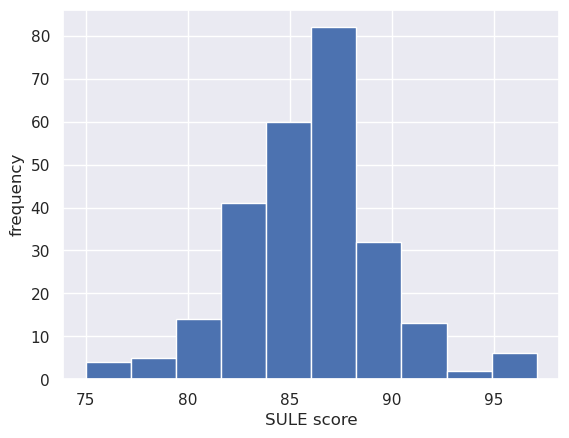

In [6]:
plt.hist(df['SULE_2'])
plt.xlabel('SULE score')
plt.ylabel('frequency')
plt.show()

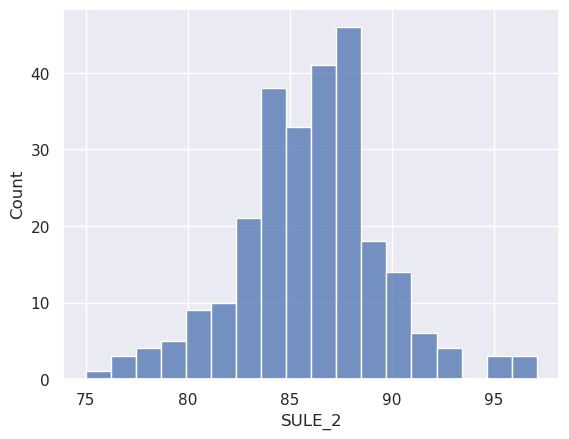

In [10]:
sns.histplot(df['SULE_2'])
plt.show()

In [12]:
num_cols = [col for col in df.columns if col != 'Unit']

/tmp/ipykernel_5302/1003701416.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


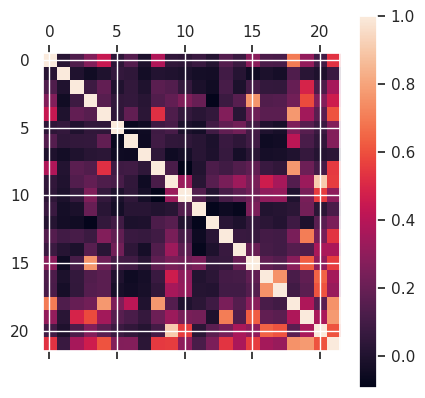

In [25]:
cov_mat = np.corrcoef(df[num_cols], rowvar=False)
plt.matshow(cov_mat)
plt.colorbar()
plt.show()

In [24]:
np.var(df[num_cols], axis=0)

Exam_1                             28.470208
Day_Land_Navigation                77.479465
LRC_2                               9.152107
Command_Evaluation_1                3.051833
Exam_2                             30.584619
Night_Land_Navigation              78.961256
Exam_3                             18.774586
6_Mile_Hike                         1.538439
Exam_4                             44.752169
Endurance_Course                   18.401962
Obstacle_Course                    14.040280
Platoon_Commander's_Inspection    134.955830
9.3_Mile_Hike                      38.460965
SULE_2                             12.305503
CFT                               166.459527
Command_Evaluation_2                4.459445
Inventory_PFT                      19.853619
Final_PFT                          18.854781
ACADEMICS                          12.371077
LEADERSHIP                          2.789227
PHYSICAL_FITNESS                    5.285210
Overall                             3.130681
dtype: flo

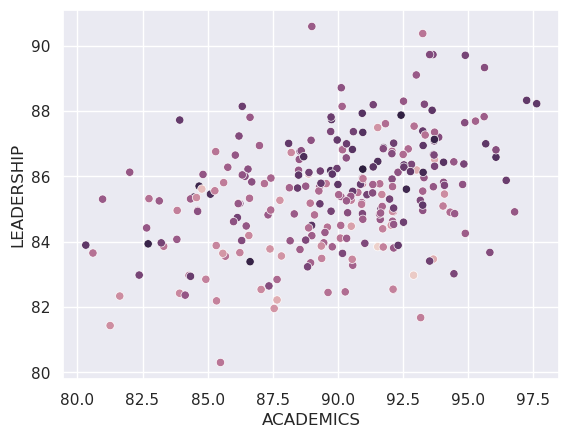

In [30]:
sns.scatterplot(x='ACADEMICS', y='LEADERSHIP', hue='PHYSICAL_FITNESS', legend=False, data=df)
plt.show()

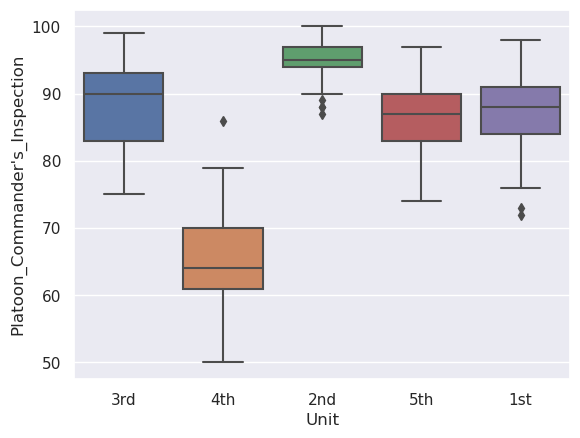

In [32]:
sns.boxplot(x='Unit', y="Platoon_Commander's_Inspection", data=df)
plt.show()

overall = .25*academics + .25*fitness + .5*leadership

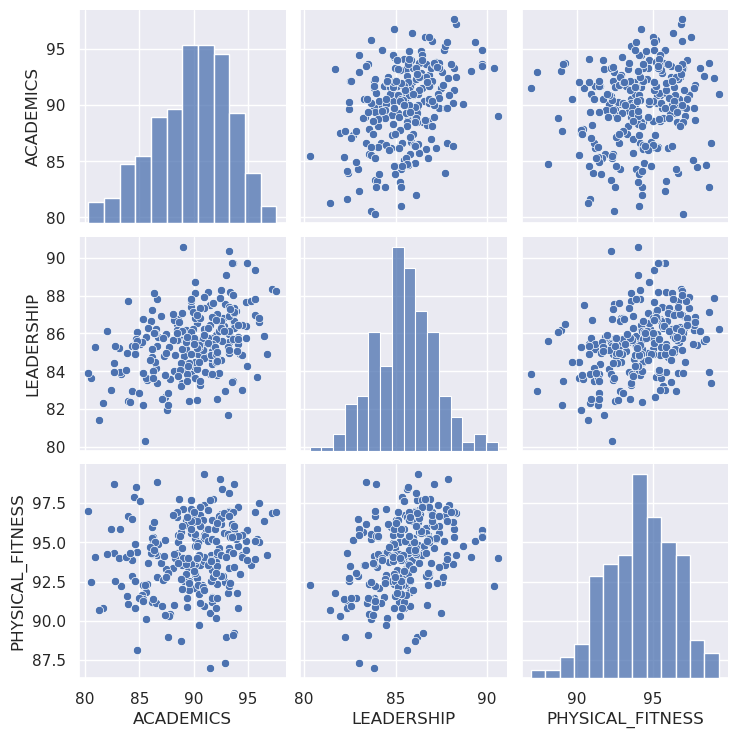

In [35]:
sns.pairplot(df[['ACADEMICS', 'LEADERSHIP', 'PHYSICAL_FITNESS']])
plt.show()

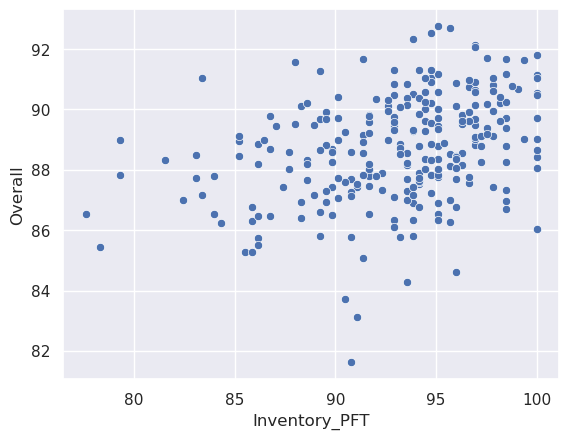

In [36]:
#overall performance predicted using initial PFT
sns.scatterplot(x='Inventory_PFT', y='Overall', data=df)
plt.show()

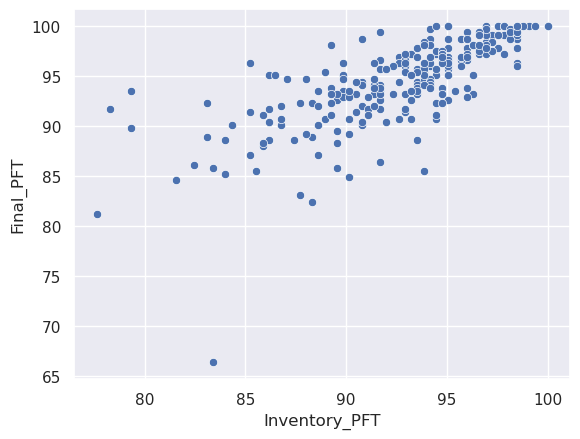

In [37]:
sns.scatterplot(x='Inventory_PFT', y='Final_PFT', data=df)
plt.show()

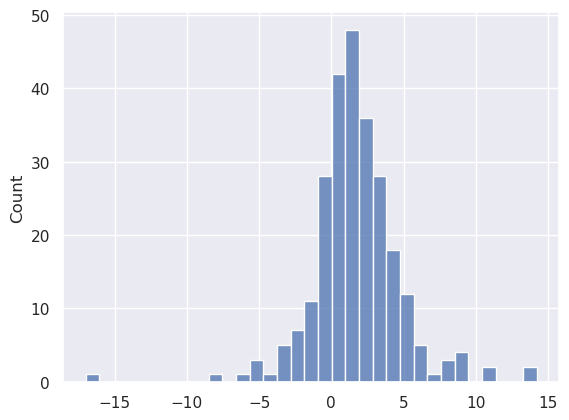

In [40]:
sns.histplot(df['Final_PFT'] - df['Inventory_PFT'])
plt.show()